Importing Library


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


ADA


In [19]:
df = pd.read_csv('parkinsons_data.csv')

# Split features and target variable
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

base_estimator = DecisionTreeClassifier(max_depth=1)
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=300)
ada_classifier.fit(X_train, y_train)
y_pred = ada_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Testing Accuracy: {accuracy * 100:.2f}%')


c:\Users\DEEPESH SAHU\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Testing Accuracy: 92.31%


Graphical Analysis


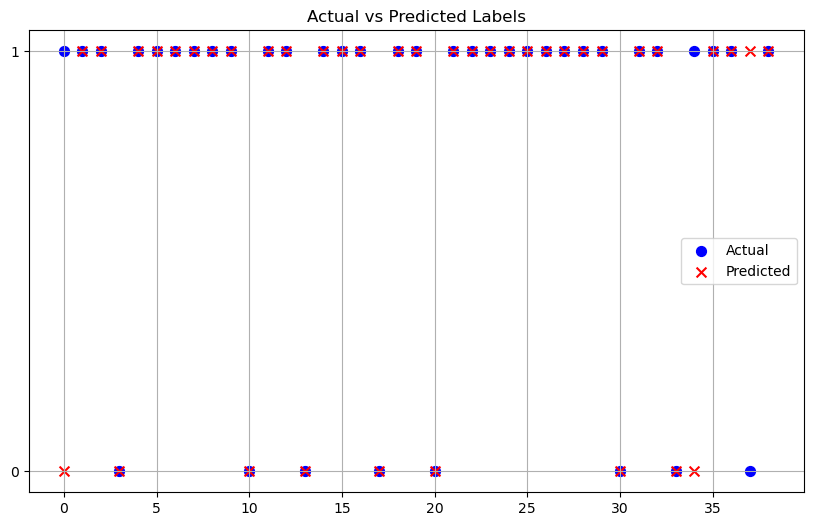

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', marker='o', s=50)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x', s=50)
plt.title('Actual vs Predicted Labels')
plt.yticks([0, 1])
plt.legend()
plt.grid(True)
plt.show()

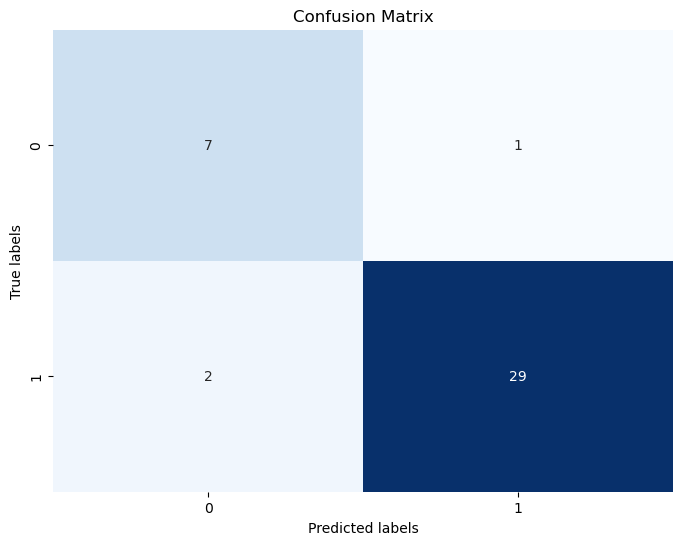

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

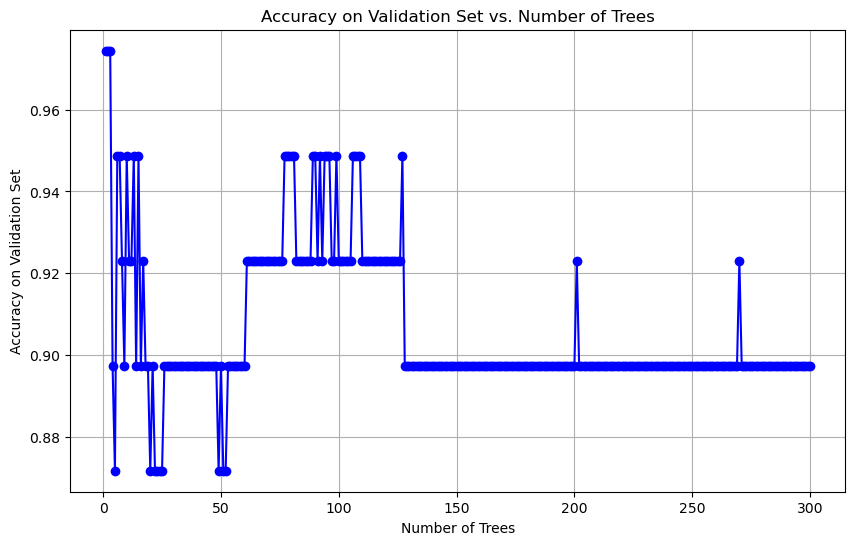

Test Accuracy using the best model: 0.7692307692307693


In [22]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize AdaBoost Classifier with decision tree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=300)

# Lists to store accuracy on validation set after each iteration
accuracy_val_list = []

# Train AdaBoost model and compute accuracy on validation set after each iteration
for i in range(1, 301):  # Iterate over 300 trees
    ada_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=i)
    ada_classifier.fit(X_train, y_train)
    y_pred_val = ada_classifier.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_val_list.append(accuracy_val)

# Plot accuracy on validation set vs. number of trees
plt.figure(figsize=(10, 6))
plt.plot(range(1, 301), accuracy_val_list, marker='o', color='blue')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy on Validation Set')
plt.title('Accuracy on Validation Set vs. Number of Trees')
plt.grid(True)
plt.show()

# Select the number of trees that gives the highest accuracy on the validation set
best_num_estimators = np.argmax(accuracy_val_list) + 1  # Add 1 to account for 0-based indexing

# Train AdaBoost model with the selected number of trees
ada_classifier_best = AdaBoostClassifier(estimator=base_estimator, n_estimators=best_num_estimators)
ada_classifier_best.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = ada_classifier_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test Accuracy using the best model:', test_accuracy)